## Fetching data

To obtain the data, you need the Google Cloud SDK from https://cloud.google.com/sdk/downloads .

Now you can fetch the data with something like this
```
gcloud auth login
# Opens a browser and prompts you to sign into the Google account registered with Rajat

gsutil -m rsync -r gs://depi-dataset_01/  file:///home/myself/AION/depi
# Fetches the data
```

## Setting up Jupyter

I'm using MiniConda from https://conda.io/miniconda.html .

```
conda install -c conda-forge nipy ipyvolume ipywidgets
```


In [8]:
import numpy as np
import ipyvolume as ipv
import nipy
import os

In [11]:
def find_files(rootdir, substring):
    for root, dirs, files in os.walk(rootdir):
        for filename in files:
            if filename.endswith(".gz"):
                if substring is None or substring in filename:
                    yield os.path.join(root, filename)

In [12]:
DATA_DIR="/home/ben/sync/code/AION/depi"

In [15]:
images = []
for file in find_files(DATA_DIR, "4mm"):
    images.append(nipy.load_image(file))

In [17]:
len(images)

2226

Now we can use `ipyvolume` to make interactive 3d plots of some scans.

In [34]:
def showvol(V):
    return ipv.quickvolshow(V, 
                     levels=(V.min(), 0, V.max()), 
                     opacity=0.03, 
                     lighting=True,
                     level_width=0.1, 
                     data_min=V.min(), 
                     data_max=V.max())


In [35]:
showvol(images[5].get_data())

/home/ben/miniconda3/lib/python3.6/site-packages/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


VBox(children=(VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.1, max=1.0, step=0.001), FloatSlider(value=0.5, max=1.0, step=0.001), FloatSlider(value=0.9, max=1.0, step=0.001))), HBox(children=(Label(value='opacities:'), FloatSlider(value=0.03, max=0.2, step=0.001), FloatSlider(value=0.03, max=0.2, step=0.001), FloatSlider(value=0.03, max=0.2, step=0.001))))), Figure(camera_center=[0.0, 0.0, 0.0], data_max=182.18568420410156, data_min=-23.93340492248535, height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'axes': {'visible': True, 'label': {'color': 'black'}, 'ticklabel': {'color': 'black'}, 'color': 'black'}, 'box': {'visible': True}, 'background-color': 'white'}, tf=TransferFunctionWidgetJs3(level3=0.9, opacity1=0.03, opacity2=0.03, opacity3=0.03), volume_data=array([[[-0., -0., -0., ..., -0., -0.,  0.],
        [ 0., -0., -0., ...,  0.,  0., -0.],
        [-0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0., -0.,  0., ..., -0.,  0.,  0.],
        [ 0., -0., -0., ...,  0.,  0.,  0.],
        [ 0.,  0., -0., ...,  0., -0., -0.]],

       [[-0.,  0., -0., ..., -0., -0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ..., 
        [ 0.,  0.,  0., ..., -0.,  0.,  0.],
        [ 0., -0.,  0., ..., -0.,  0.,  0.],
        [ 0.,  0.,  0., ..., -0., -0., -0.]],

       [[ 0.,  0., -0., ..., -0., -0., -0.],
        [-0.,  0., -0., ..., -0., -0.,  0.],
        [ 0., -0., -0., ...,  0., -0., -0.],
        ..., 
        [ 0., -0., -0., ..., -0., -0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., -0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[-0., -0., -0., ...,  0.,  0., -0.],
        [-0.,  0.,  0., ..., -0., -0., -0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [-0.,  0.,  0., ...,  0., -0.,  0.],
        [-0., -0., -0., ..., -0.,  0.,  0.],
        [-0., -0.,  0., ...,  0., -0., -0.]],

       [[ 0.,  0., -0., ..., -0.,  0.,  0.],
        [-0., -0.,  0., ...,  0.,  0.,  0.],
        [-0.,  0., -0., ..., -0., -0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., -0., -0.,  0.],
        [ 0., -0., -0., ...,  0.,  0.,  0.]],

       [[ 0., -0., -0., ...,  0., -0., -0.],
        [-0., -0., -0., ...,  0., -0., -0.],
        [ 0.,  0.,  0., ..., -0., -0.,  0.],
        ..., 
        [-0.,  0.,  0., ..., -0., -0.,  0.],
        [-0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., -0., -0., ..., -0.,  0., -0.]]], dtype=float32), width=400, xlim=[0.0, 1.0], ylim=[0.0, 1.0], zlim=[0.0, 1.0]), HBox(children=(FloatSlider(value=0.5, description='ambient', max=1.0, step=0.001), FloatSlider(value=0.8, description='diffuse', max=1.0, step=0.001))), HBox(children=(FloatSlider(value=0.5, description='specular', max=1.0, step=0.001), FloatSlider(value=5.0, description='specular exp', max=10.0, step=0.001)))))

In [36]:
showvol(images[6].get_data())

/home/ben/miniconda3/lib/python3.6/site-packages/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


VBox(children=(VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.1, max=1.0, step=0.001), FloatSlider(value=0.5, max=1.0, step=0.001), FloatSlider(value=0.9, max=1.0, step=0.001))), HBox(children=(Label(value='opacities:'), FloatSlider(value=0.03, max=0.2, step=0.001), FloatSlider(value=0.03, max=0.2, step=0.001), FloatSlider(value=0.03, max=0.2, step=0.001))))), Figure(camera_center=[0.0, 0.0, 0.0], data_max=2871.507080078125, data_min=-253.79977416992188, height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'axes': {'visible': True, 'label': {'color': 'black'}, 'ticklabel': {'color': 'black'}, 'color': 'black'}, 'box': {'visible': True}, 'background-color': 'white'}, tf=TransferFunctionWidgetJs3(level3=0.9, opacity1=0.03, opacity2=0.03, opacity3=0.03), volume_data=array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [-0., -0.,  0., ...,  0., -0.,  0.],
        [ 0.,  0.,  0., ...,  0., -0., -0.],
        [-0., -0., -0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0., -0., -0., ...,  0., -0., -0.],
        [ 0.,  0.,  0., ...,  0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0., -0., -0., ..., -0., -0., -0.],
        [-0.,  0.,  0., ...,  0.,  0., -0.],
        [-0., -0., -0., ..., -0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., -0., ...,  0.,  0.,  0.],
        [ 0.,  0., -0., ...,  0., -0.,  0.],
        ..., 
        [ 0., -0., -0., ..., -0.,  0.,  0.],
        [ 0., -0., -0., ..., -0., -0.,  0.],
        [ 0.,  0.,  0., ..., -0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., -0., ...,  0.,  0.,  0.],
        [-0., -0.,  0., ..., -0., -0.,  0.],
        ..., 
        [-0.,  0., -0., ..., -0., -0.,  0.],
        [-0.,  0.,  0., ..., -0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-0., -0., -0., ...,  0.,  0.,  0.],
        [-0., -0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ..., -0., -0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-0.,  0.,  0., ...,  0., -0.,  0.]]], dtype=float32), width=400, xlim=[0.0, 1.0], ylim=[0.0, 1.0], zlim=[0.0, 1.0]), HBox(children=(FloatSlider(value=0.5, description='ambient', max=1.0, step=0.001), FloatSlider(value=0.8, description='diffuse', max=1.0, step=0.001))), HBox(children=(FloatSlider(value=0.5, description='specular', max=1.0, step=0.001), FloatSlider(value=5.0, description='specular exp', max=10.0, step=0.001)))))

# Investigating normalization

It looks like the dynamic range varies, some images have max voxel values in the millions, some in the tens.

Also, histograms show that there is a large peak with most of the voxels close to, but not exactly zero.  

The data also has some negative valued voxels.
Apart from the peak near zero, the rest of the data in each image has a multimodal distribution generally with two pronounced peaks (and maybe some other modes depending on the image).  There's quite a lot of variation in the histogram shapes.

In [38]:
%matplotlib inline

In [39]:
import matplotlib.pyplot as plt

In [123]:

np.argmax([image.get_data().max() for image in images])
# 888
V = images[888].get_data()
V.max()

1662147.5

In [124]:
def showstats(n, thresh=None):
    V = images[n].get_data()
    ran = V.max() - V.min()
    if thresh is None:
        thresh = V.max() * 0.001
    filt = V[np.abs(V) > thresh]
    plt.hist(filt.ravel(), bins=100)

Let's see a a few histograms from different images:

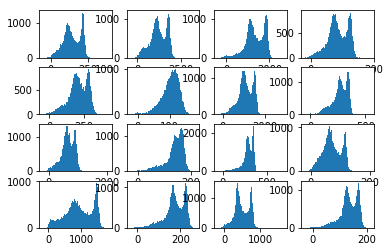

In [144]:
X = Y = 4
for n in range(X*Y):
    plt.subplot(X, Y, n+1)
    showstats(n)

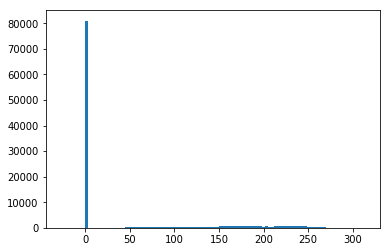

In [147]:
showstats(20, thresh=-np.inf) # all the data for image 20

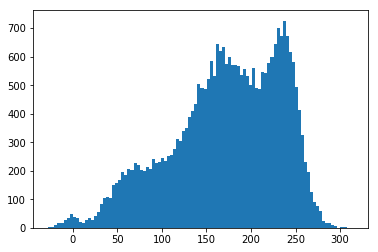

In [146]:
showstats(20) # with the bottom 0.1% of max excluded

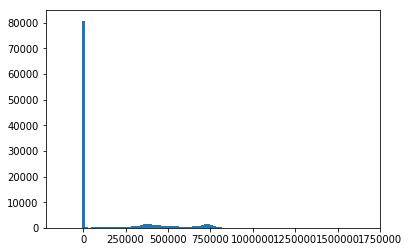

In [148]:
showstats(888, -np.inf) # all for image 888, with max range

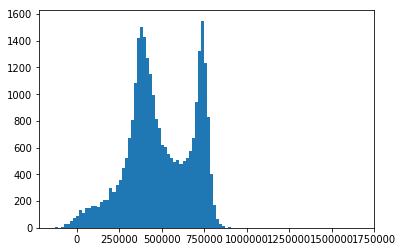

In [149]:
showstats(888)